# Sandbox

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates

from writeup_func import *

In [2]:
users1 = pd.read_csv("../data/users1.csv")
users2 = pd.read_csv("../data/users2.csv")
users3 = pd.read_csv("../data/users3.csv")

In [3]:
users = pd.concat([users1, users2, users3])
users.shape

(5241, 10)

In [4]:
tweets1 = pd.read_csv("../data/tweets1.csv", low_memory=False)
tweets2 = pd.read_csv("../data/tweets2.csv", low_memory=False)
tweets3 = pd.read_csv("../data/tweets3_1.csv", low_memory=False)
tweets4 = pd.read_csv("../data/tweets3_2.csv", low_memory=False)
tweets5 = pd.read_csv("../data/tweets3_3.csv", low_memory=False)

In [41]:
tweets = pd.concat([tweets1, tweets2, tweets3, tweets4, tweets5])
tweets.shape

(13847731, 31)

In [42]:
# to datetime
users_dt = pd.to_datetime(users.account_creation_date)
users.loc[:,'account_creation_date'] = users_dt.values
tweets.loc[:, 'tweet_time'] = pd.to_datetime(tweets.tweet_time).values

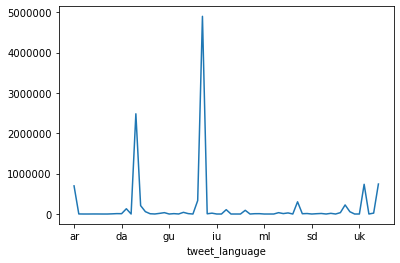

In [43]:
tweets['tweet_language'].groupby(tweets['tweet_language']).count().plot()

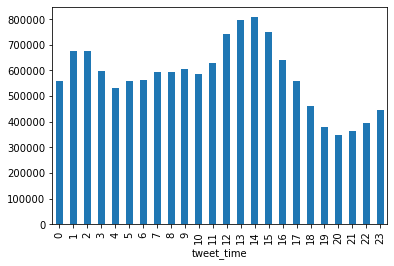

In [44]:
tweets['tweet_time'].groupby(tweets['tweet_time'].dt.hour).count().plot(kind='bar')

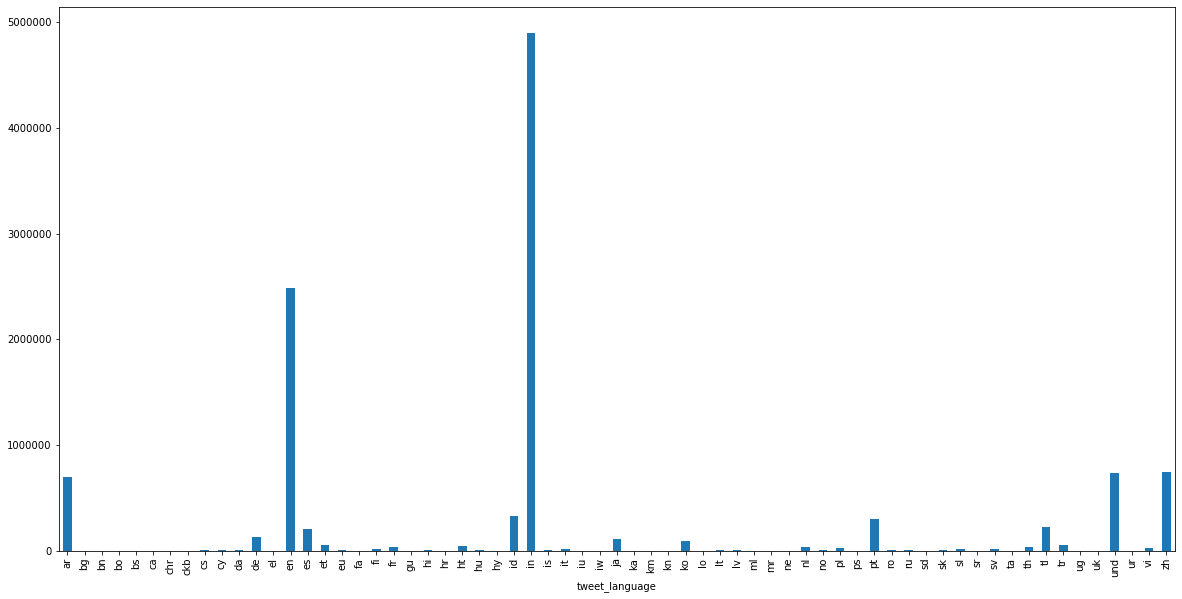

In [45]:
tweet_lang_groupby = tweets['tweet_language'].groupby(tweets['tweet_language']).count()
tweet_lang_groupby.plot(kind='bar', figsize=(20,10))

In [46]:
tweets['tweet_language'].groupby(tweets['tweet_language']).count().nlargest(10)

tweet_language
in     4898835
en     2483706
zh      743190
und     736252
ar      697315
id      333096
pt      302572
tl      225020
es      208176
de      130312
Name: tweet_language, dtype: int64

In [47]:
tweet_time_groupby = tweets['tweet_time'].groupby(tweets['tweet_time'].dt.hour).count()

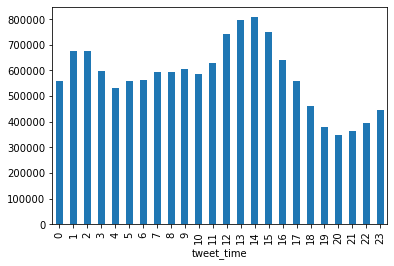

In [48]:
tweet_time_groupby.plot(kind='bar')

In [49]:
tweet_lang_groupby.sort_values(ascending=False).iloc[0]/tweet_lang_groupby.sum()

0.4281096717767735

In [50]:
tweet_lang_user = tweets[['userid','tweet_language']][tweets['tweet_language'] == 'in']['userid']

In [51]:
tweet_lang_user.groupby(tweet_lang_user).count().nlargest(10)

userid
832941887539417088    240881
1358701388            216699
769790067183190016    181132
907691540             173056
1936199119            160491
718766229700227072    148549
775462690210787329    126045
791015242448850945    116612
824772841             114218
760761981854883840    111864
Name: userid, dtype: int64

In [52]:
tweet_lang_user.nunique()

666

In [53]:
tweets[tweets['userid'] == '832941887539417088'].sort_values(by='tweet_time')[['tweet_text','tweet_time','tweet_client_name']]

,tweet_text,tweet_time,tweet_client_name
744294,Telkomsel: adisekali Baik. Jika ada hal lain y...,2017-02-18 13:21:00,IFTTT
124233,Telkomsel: Riyana_Aaf Terima kasih telah berpa...,2017-02-18 13:21:00,IFTTT
237441,"IndosatCare: Najib_al Hai kak, bisa DM nama, n...",2017-02-18 13:22:00,IFTTT
138744,IndosatCare: wahdiyawan Keterangan sinyalnya a...,2017-02-18 13:22:00,IFTTT
1558,Telkomsel: baekhun494 Hai. Mengenai pertanyaan...,2017-02-18 13:23:00,IFTTT
...,...,...,...
551033,https://t.co/Qfv4mLEqMo,2019-07-28 23:59:00,Twitter Web App
1793930,https://t.co/0A1iJ5ki58,2019-07-28 23:59:00,Twitter Web App
928618,https://t.co/FL0S8Dj7ke,2019-07-29 21:28:00,Twitter Web App
2786356,https://t.co/hZdyLNxPQW,2019-07-29 21:28:00,Twitter Web App


In [54]:
webclient = tweets[['tweet_client_name', 'tweet_time']][tweets['tweet_client_name'] == 'Twitter Web Client']
other = tweets[tweets['tweet_client_name'] != 'Twitter Web Client']

In [55]:
plt.figure(num=None, figsize=(10, 4), dpi=80, facecolor='w', edgecolor='k')
plt.title("Simplified vs Traditional Tweets")
plt.plot( 'tweet_time', 'traditional', data=tweets[tweets[, marker='o', markerfacecolor='darkcyan', markersize=5, color='teal', linewidth=1)
plt.plot( 'tweet_time', 'simplified', data=dialect, marker='o', markerfacecolor='lightsteelblue', markersize=5, color='lavender', linewidth=1)
plt.legend()

SyntaxError: invalid syntax (<ipython-input-55-8c848e20515c>, line 3)

In [ ]:
webclient.groupby([webclient['tweet_time'].dt.year]).count().plot()

In [101]:
# example of looking at behavior of acc before and after take over
biggest_tweeter_id = tweets[['userid', 'tweet_client_name']].groupby('userid').count()['tweet_client_name'].sort_values(ascending=False).index[2]
biggest_tweeter_id

'769790067183190016'

In [109]:
biggest_tweeter_df = tweets[tweets['userid'] == biggest_tweeter_id][['tweet_text', 'tweet_time', 'tweet_client_name']]
biggest_tweeter_df['tweet_year'] = biggest_tweeter_df['tweet_time'].dt.year
biggest_tweeter_df['web_client'] = biggest_tweeter_df['tweet_client_name'].apply(lambda x: 1 if any(y in x for y in ['Web', 'web','for Windows']) else 0)
biggest_tweeter_df.head()

,tweet_text,tweet_time,tweet_client_name,tweet_year,web_client
449,https://t.co/4FTuD4PCaX,2016-12-05 12:19:00,Twitter Web Client,2016,1
450,// yha 4G lelet😌,2017-01-21 11:22:00,Twitter Web Client,2017,1
451,aminin ga nih? https://t.co/NqY5OhlccI,2017-02-02 12:43:00,Twitter Web Client,2017,1
452,看你挺瘦 浑身是力气：https://t.co/mKytAp5P7o（来自@YouTube）,2019-01-05 12:15:00,Google,2019,0
453,jieqngs: ktaechu baikk. kamu??,2017-01-03 06:21:00,IFTTT,2017,0


In [110]:
biggest_tweeter_df.groupby([biggest_tweeter_df.tweet_year]).sum()

,tweet_year,web_client
tweet_year,,
2016,413197344,110
2017,113547015,5153
2018,5880452,27
2019,910569,175


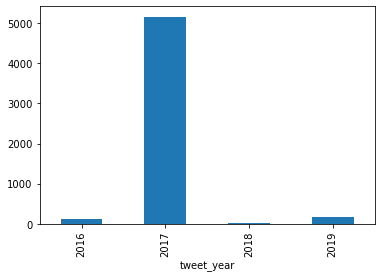

In [111]:
biggest_tweeter_df.groupby('tweet_year')['web_client'].sum().plot(kind='bar')

In [112]:
biggest_tweeter_df.tweet_client_name.unique()

array(['Twitter Web Client', 'Google', 'IFTTT', 'RoundTeam', 'TweetDeck',
       'Twitter for iPhone', 'Twitter Web App', 'Twitter for Windows',
       'Zapier.com', 'Twitter for Android', 'Mobile Web (M2)'],
      dtype=object)

In [123]:
tweets[['tweet_client_name', 'userid']].groupby('tweet_client_name').count().nlargest(10, columns='userid')

,userid
tweet_client_name,
Twitter for Android,3212166
IFTTT,2302527
Twitter for iPhone,1603947
Twitter Web Client,1433836
web,911603
SocialOomph,743848
TweetDeck,496254
twitterfeed,468105
Twitter for BlackBerry®,294582


In [116]:
tweets.columns

Index(['tweetid', 'userid', 'user_display_name', 'user_screen_name',
       'user_reported_location', 'user_profile_description',
       'user_profile_url', 'follower_count', 'following_count',
       'account_creation_date', 'account_language', 'tweet_language',
       'tweet_text', 'tweet_time', 'tweet_client_name', 'in_reply_to_userid',
       'in_reply_to_tweetid', 'quoted_tweet_tweetid', 'is_retweet',
       'retweet_userid', 'retweet_tweetid', 'latitude', 'longitude',
       'quote_count', 'reply_count', 'like_count', 'retweet_count', 'hashtags',
       'urls', 'user_mentions', 'poll_choices'],
      dtype='object')

# IMPORTANT STUFF HERE
studying a single user to find that "sold" moment, and then observing the activity before vs after

In [145]:
user_study = tweets[tweets['userid'] == '832941887539417088'][['tweet_text','tweet_client_name','tweet_time']].sort_values(by='tweet_time').reset_index(drop=True)
user_study.head()

,tweet_text,tweet_client_name,tweet_time
0,Telkomsel: adisekali Baik. Jika ada hal lain y...,IFTTT,2017-02-18 13:21:00
1,Telkomsel: Riyana_Aaf Terima kasih telah berpa...,IFTTT,2017-02-18 13:21:00
2,"IndosatCare: Najib_al Hai kak, bisa DM nama, n...",IFTTT,2017-02-18 13:22:00
3,IndosatCare: wahdiyawan Keterangan sinyalnya a...,IFTTT,2017-02-18 13:22:00
4,Telkomsel: baekhun494 Hai. Mengenai pertanyaan...,IFTTT,2017-02-18 13:23:00


In [148]:
user_study.iloc[245649:245649+10]
# first tweet says should i sell, then after says sold, but then the tweet_client_name changes after this

,tweet_text,tweet_client_name,tweet_time
245649,Mendingan rest atau jual acc ini?,Twitter for Android,2019-06-07 04:24:00
245650,Lelang acc ini\n\nKemaren gue beli 330k bantu ...,Twitter for Android,2019-06-07 04:27:00
245651,@bieyeay Padahal udh ga di private acc nya,Twitter for Android,2019-06-07 04:28:00
245652,@nagqyung Dm dm🙈,Twitter for Android,2019-06-07 04:29:00
245653,@teahyuenq Seriusan lebih?,Twitter for Android,2019-06-07 04:29:00
245654,Sold yaaa 🤭,Twitter for Android,2019-06-07 04:31:00
245655,RT @rwosce: https://t.co/AbLxRIYoR2,Twitter Web Client,2019-06-10 03:54:00
245656,RT @yellowsub_527: 190609 인기가요 #쥬타임\n#우주소녀 #은서...,Twitter Web Client,2019-06-10 03:55:00
245657,RT @minjufeed: 190608 ┊͙ #김민주 \n© martini blu ...,Twitter Web Client,2019-06-10 03:55:00
245658,https://t.co/Ghsz0QcanL,Twitter Web Client,2019-06-11 00:12:00


In [151]:
user_study['web_client'] = user_study['tweet_client_name'].apply(lambda x: 1 if any(y in x for y in ['Web', 'web','for Windows']) else 0)

In [152]:
user_study.groupby([user_study.tweet_time.dt.year]).sum()

,web_client
tweet_time,
2017,7
2018,42
2019,152


In [159]:
tweets[tweets.tweet_text.str.contains('sold')].tweet_text

1430       PLAYMFS: #ptl\nlelang acc ratusan, 1k, 2k, sm ...
8324       : Sky_War1 Entendu. Le solde Paypal n'est pas ...
9994       PLAYMFS: #ptl lelang acc\nf 10k t 181k \nf 10k...
27599      : phantom_soldier Hi kak, mohon maaf boleh inf...
33321      Angelasoldonuts We don't have any info about t...
                                 ...                        
2860473    Live: Remains of 10 Chinese soldiers who fough...
2862752    RT Echinanews "Chinese soldier trains with his...
2865214    RT BBCNewsAsia: A rare sacred Chinese bronze w...
2867623    For celebrating the new imperial era of Japan,...
2874274    Westfield, the owner of the World Trade Center...
Name: tweet_text, Length: 2333, dtype: object

In [14]:
tweets1.shape

(1898108, 31)